In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import pandas as pd

import json

import matplotlib.pyplot as plt

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
file_ = '../output/DATGAN_FC/logs/stats.json'
#file_ = '../output/DATGAN_AVG/logs/stats.json'

In [4]:
with open(file_) as json_file:
    stats = json.load(json_file)

In [5]:
stats[0].keys()

dict_keys(['QueueInput/queue_size', 'GAN_loss/gen/loss', 'GAN_loss/gen/klloss', 'GAN_loss/gen/final-g-loss', 'GAN_loss/discrim/loss', 'GAN_loss/discrim/accuracy_real', 'GAN_loss/discrim/accuracy_fake', 'epoch_num', 'global_step'])

# Discriminator accuracy

In [6]:
acc_fake = []
acc_real = []

for d in stats:
    acc_fake.append(d['GAN_loss/discrim/accuracy_fake'])
    acc_real.append(d['GAN_loss/discrim/accuracy_real'])
    
epochs = list(range(1,len(stats)+1))

Text(0, 0.5, 'Accuracy')

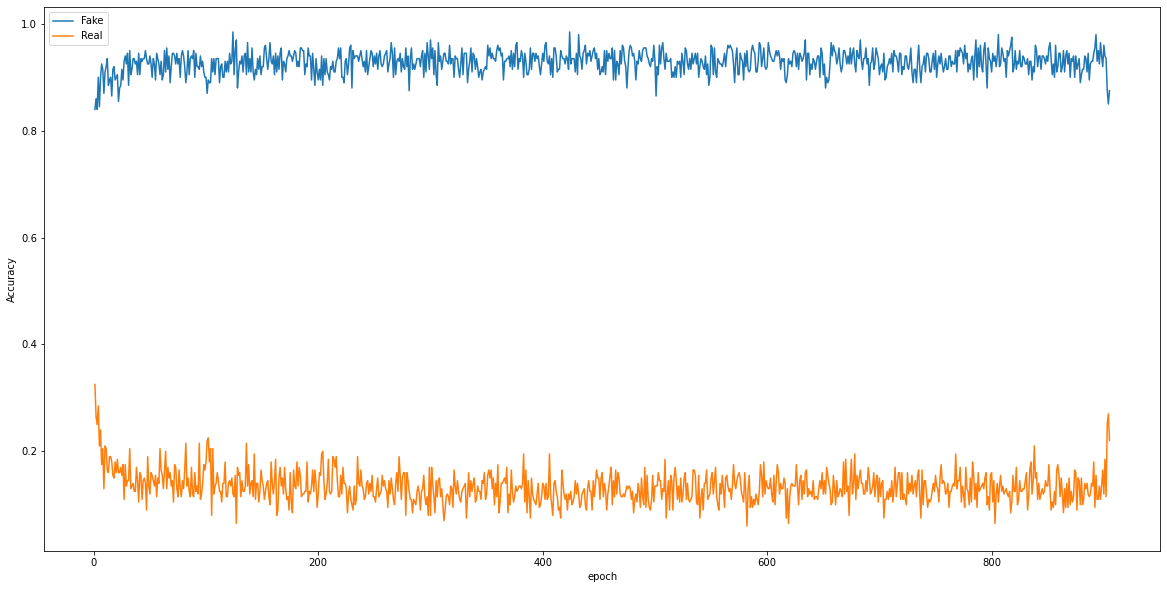

In [7]:
plt.figure(figsize=(20,10))

plt.plot(epochs, acc_fake, label='Fake')
plt.plot(epochs, acc_real, label='Real')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('Accuracy')

# Discriminator and Generator loss

In [8]:
gen_loss = []
discr_loss = []

for d in stats:
    gen_loss.append(d['GAN_loss/gen/loss'])
    discr_loss.append(d['GAN_loss/discrim/loss'])
    
epochs = list(range(1,len(stats)+1))

Text(0, 0.5, 'Loss')

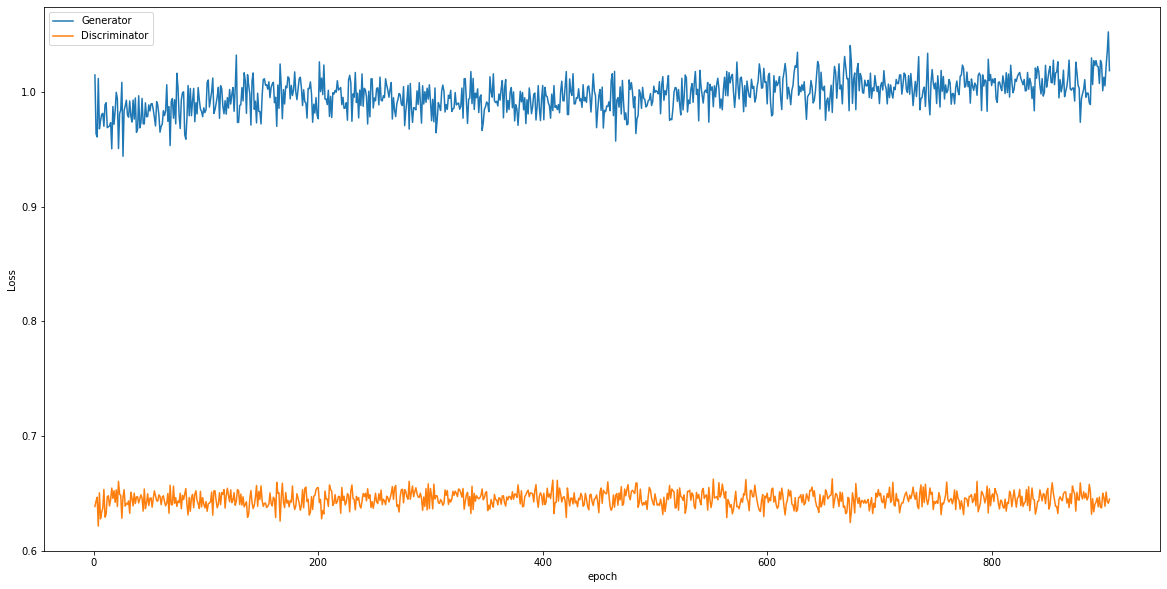

In [9]:
plt.figure(figsize=(20,10))

plt.plot(epochs, gen_loss, label='Generator')
plt.plot(epochs, discr_loss, label='Discriminator')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('Loss')